<a href="https://colab.research.google.com/github/ottogin/digital_strawberry/blob/dev_egor/Agrohack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
import keras.backend as K
import tensorflow as tf
from copy import deepcopy
from google.colab import drive
drive.mount('/content/drive')
Folder='/content/drive/My Drive/Agrohack/'

Mounted at /content/drive


In [218]:
from tqdm import tqdm

In [2]:
import cv2
!ls drive/MyDrive/Agrohack/Data/Batch1/Berries

25C0E22E-E588-4C3C-97CC-20C3EE3AACDA_1_105_c.jpeg
2ACC0425-6663-46D8-9C01-D65E4CB7D274_1_105_c.jpeg
37786E52-F57E-4777-A9E8-D94CBFE89EAD_1_105_c.jpeg
560ECBF1-C980-469A-A59D-C72125E93902_1_105_c.jpeg
5DD7B883-B051-4FF8-8645-760CF7947213_1_105_c.jpeg
6377D9FB-3CA6-4758-A905-1EB72F3C8F89_1_105_c.jpeg
63C7C8B5-084F-4010-879C-22EFF1B788D2_1_105_c.jpeg
6D9BF89A-42AA-43C9-A751-A700454A7B50_1_105_c.jpeg
71BC10BA-C1AD-4F2D-B51A-D027513BE5DD_1_105_c.jpeg
740F7714-D0EE-4984-A272-6862138439F7_1_105_c.jpeg
7598659E-78D2-49F7-8386-D7E851C68FAD_1_105_c.jpeg
8EE09B77-68B3-42A9-A3ED-14E4FAF05336_1_105_c.jpeg
C96C7D76-9DCD-4A66-82B5-7B45989839BE_1_105_c.jpeg
D70F062B-79B1-4F32-9FD7-D9ADD1967B52_1_105_c.jpeg
FA0044B7-FF68-4AF9-A0CC-FD8D2EE84834_1_105_c.jpeg


In [4]:
img=cv2.imread(Folder+'Data/Batch1/Berries/6D9BF89A-42AA-43C9-A751-A700454A7B50_1_105_c.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

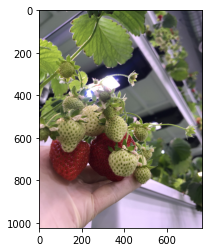

In [5]:
plt.imshow(img)

In [167]:
from PIL import Image
from PIL.ExifTags import TAGS

# Date extraction

In [261]:
def meta_to_data(filepath):
  #Read metadata of the image
  with Image.open(filepath) as input_image:
    exifdata=input_image.getexif()

  #No metadata
  if len(exifdata)==0:
    return pd.to_datetime(np.nan)

  #Fine all the fields that concern date
  date_strings=np.array([exifdata.get(tag_id) if ('date' in str(TAGS.get(tag_id, tag_id)).lower()) else str(np.nan) for tag_id in exifdata])

  #return date_strings
  dates_mask=np.where(date_strings!='nan')[0]
  date_strings=date_strings[dates_mask]
  
  #Case if no date-related metadata
  if len(date_strings)==0:
    return pd.to_datetime(np.nan)

  #Transform the date fields to proper date format
  date_times=np.array([],dtype='datetime64')
  
  for i,string in enumerate(date_strings):
    date,time=string.split()
    corrected_date='-'.join(date.split(':'))
    date_times=np.append(date_times,np.datetime64(corrected_date+'T'+time))

  #Return the earliest date (supposed to be one when the shot was made)
  return pd.to_datetime(date_times).min()

In [204]:
q=meta_to_data(Folder+'Data/Batch1/Berries/6D9BF89A-42AA-43C9-A751-A700454A7B50_1_105_c.jpeg')
#q=meta_to_data(Folder+'Data/Batch1/Berries/C96C7D76-9DCD-4A66-82B5-7B45989839BE_1_105_c.jpeg')
meta_to_data(Folder+'Data/Batch1/Berries/37786E52-F57E-4777-A9E8-D94CBFE89EAD_1_105_c.jpeg')

NaT

In [262]:
import os
# assign directory
directory = Folder+'Data/'
df=pd.DataFrame(columns=['Batch','Class','im_number','Datetime','filename'])

Classes=['Sapling','Flowers','Berries']

for batch_index in tqdm(range(3)):
  for class_index,class_name in tqdm(enumerate(Classes)):
      path_class=os.path.join(directory, 'Batch{:.0f}'.format(batch_index),class_name)
      #Iterate over files in particular class
      for index_file,filename in enumerate(os.listdir(path_class)):
        f = os.path.join(path_class, filename)
        datetime=meta_to_data(f)
        df=df.append(pd.Series([batch_index,class_name,index_file,datetime,f.split('/')[-1]],index=df.columns,name=index_file))

  0%|          | 0/3 [00:00<?, ?it/s]
0it [00:00, ?it/s]
2it [00:00, 13.11it/s]
2it [00:10, 13.11it/s]
3it [00:13,  4.63s/it]
 33%|███▎      | 1/3 [00:13<00:27, 13.91s/it]
0it [00:00, ?it/s]
1it [00:03,  3.53s/it]
2it [00:05,  2.41s/it]
3it [00:05,  1.77s/it]
 67%|██████▋   | 2/3 [00:19<00:08,  8.85s/it]
0it [00:00, ?it/s]
1it [02:58, 178.53s/it]
2it [03:16, 83.85s/it] 
3it [05:02, 100.80s/it]
100%|██████████| 3/3 [05:21<00:00, 107.21s/it]


In [263]:
df

,Batch,Class,im_number,Datetime,filename
0,0,Flowers,0,2020-04-14 16:01:17,F79D7120-B895-4483-B3A4-9196EEEC4EDC_1_105_c.jpeg
1,0,Flowers,1,2020-04-14 16:02:12,F174DE41-080D-4C7F-9CA5-A3E77DCC5049_1_105_c.jpeg
2,0,Flowers,2,2020-12-22 11:55:21,IMG_20201222_115521.jpg
3,0,Flowers,3,2020-12-22 11:55:42,IMG_20201222_115542.jpg
4,0,Flowers,4,2020-12-22 11:55:57,IMG_20201222_115557.jpg
...,...,...,...,...,...
336,2,Berries,336,2021-08-23 12:10:49,IMG_20210823_121047.jpg
337,2,Berries,337,2021-08-23 12:11:08,IMG_20210823_121107.jpg
338,2,Berries,338,2021-08-23 12:19:53,IMG_20210823_121952.jpg
339,2,Berries,339,2021-08-23 14:32:44,IMG_20210823_143241.jpg


In [268]:
res_df=deepcopy(df)

In [284]:
df.reset_index(drop=True)

,Batch,Class,im_number,Datetime,filename,Filepath
0,0,Flowers,0,2020-04-14 16:01:17,F79D7120-B895-4483-B3A4-9196EEEC4EDC_1_105_c.jpeg,Data/Batch0/Flowers/F79D7120-B895-4483-B3A4-91...
1,0,Flowers,1,2020-04-14 16:02:12,F174DE41-080D-4C7F-9CA5-A3E77DCC5049_1_105_c.jpeg,Data/Batch0/Flowers/F174DE41-080D-4C7F-9CA5-A3...
2,0,Flowers,2,2020-12-22 11:55:21,IMG_20201222_115521.jpg,Data/Batch0/Flowers/IMG_20201222_115521.jpg
3,0,Flowers,3,2020-12-22 11:55:42,IMG_20201222_115542.jpg,Data/Batch0/Flowers/IMG_20201222_115542.jpg
4,0,Flowers,4,2020-12-22 11:55:57,IMG_20201222_115557.jpg,Data/Batch0/Flowers/IMG_20201222_115557.jpg
...,...,...,...,...,...,...
1623,2,Berries,336,2021-08-23 12:10:49,IMG_20210823_121047.jpg,Data/Batch2/Berries/IMG_20210823_121047.jpg
1624,2,Berries,337,2021-08-23 12:11:08,IMG_20210823_121107.jpg,Data/Batch2/Berries/IMG_20210823_121107.jpg
1625,2,Berries,338,2021-08-23 12:19:53,IMG_20210823_121952.jpg,Data/Batch2/Berries/IMG_20210823_121952.jpg
1626,2,Berries,339,2021-08-23 14:32:44,IMG_20210823_143241.jpg,Data/Batch2/Berries/IMG_20210823_143241.jpg


In [ ]:
df['Filepath']=[os.path.join('Data', 'Batch{:.0f}'.format(df.iloc[i].Batch),df.iloc[i].Class,df.iloc[i].filename) for i in range(len(df))]

In [285]:
#df.to_csv(directory+'Labels.csv')

# Archive all the images

In [305]:
for i in tqdm(range(len(df))):
  path=df.iloc[i].Filepath
  filename=df.iloc[i].filename
  img=cv2.imread(Folder+path)
  cv2.imwrite(Folder+'Data/Dataset/'+filename,img)
  #print(Folder+'Data/Dataset/'+filename)

100%|██████████| 1628/1628 [17:21<00:00,  1.56it/s]


In [431]:
!ls '/content/drive/My Drive/Agrohack/Data/Dataset' | wc -l

1613


In [316]:
#!tar -czvf '/content/drive/My Drive/Agrohack/Data/output_file_name.tar.gz' '/content/drive/My Drive/Agrohack/Data/Dataset/'     #[run this cell to create tar.gz files]

In [316]:
!ls '/content/drive/My Drive/Agrohack/Data/'

Batch0	Batch1	Batch2	Dataset  Labels.csv  output_file_name.tar.gz


# Processing date for growth time extraction

In [427]:
df

,Batch,Class,im_number,Datetime,filename,Filepath
0,0,Flowers,0,2020-04-14 16:01:17,F79D7120-B895-4483-B3A4-9196EEEC4EDC_1_105_c.jpeg,Data/Batch0/Flowers/F79D7120-B895-4483-B3A4-91...
1,0,Flowers,1,2020-04-14 16:02:12,F174DE41-080D-4C7F-9CA5-A3E77DCC5049_1_105_c.jpeg,Data/Batch0/Flowers/F174DE41-080D-4C7F-9CA5-A3...
2,0,Flowers,2,2020-12-22 11:55:21,IMG_20201222_115521.jpg,Data/Batch0/Flowers/IMG_20201222_115521.jpg
3,0,Flowers,3,2020-12-22 11:55:42,IMG_20201222_115542.jpg,Data/Batch0/Flowers/IMG_20201222_115542.jpg
4,0,Flowers,4,2020-12-22 11:55:57,IMG_20201222_115557.jpg,Data/Batch0/Flowers/IMG_20201222_115557.jpg
...,...,...,...,...,...,...
336,2,Berries,336,2021-08-23 12:10:49,IMG_20210823_121047.jpg,Data/Batch2/Berries/IMG_20210823_121047.jpg
337,2,Berries,337,2021-08-23 12:11:08,IMG_20210823_121107.jpg,Data/Batch2/Berries/IMG_20210823_121107.jpg
338,2,Berries,338,2021-08-23 12:19:53,IMG_20210823_121952.jpg,Data/Batch2/Berries/IMG_20210823_121952.jpg
339,2,Berries,339,2021-08-23 14:32:44,IMG_20210823_143241.jpg,Data/Batch2/Berries/IMG_20210823_143241.jpg


0      10 days 21:44:08
1       4 days 01:15:27
2       9 days 08:31:46
3       4 days 23:09:30
4       4 days 01:25:40
             ...       
336   164 days 23:47:10
337   164 days 23:47:29
338   164 days 23:56:14
339   165 days 02:09:05
340   165 days 02:13:51
Name: Datetime, Length: 1533, dtype: timedelta64[ns]

In [478]:
df_time=deepcopy(df)
df_time.dropna()

#df_test=df[(df.Batch==2)]
df_test=deepcopy(df[df.Batch!=0].dropna())
df_test=df_test.reset_index(drop=True)
df_test.loc[:,'Datedelta']=(df_test.loc[:,'Datetime']-df_test.loc[:,'Datetime'].min()).dt.total_seconds()

In [479]:
df_test

,Batch,Class,im_number,Datetime,filename,Filepath,Datedelta
0,1,Sapling,0,2021-03-22 10:07:47,IMG_20210322_100747 114.jpg,Data/Batch1/Sapling/IMG_20210322_100747 114.jpg,942248.0
1,1,Sapling,1,2021-03-15 13:39:06,IMG_20210315_133906 315.jpg,Data/Batch1/Sapling/IMG_20210315_133906 315.jpg,350127.0
2,1,Sapling,2,2021-03-20 20:55:25,IMG_20210320_205525 316.jpg,Data/Batch1/Sapling/IMG_20210320_205525 316.jpg,808306.0
3,1,Sapling,3,2021-03-16 11:33:09,IMG_20210316_113309 411.jpg,Data/Batch1/Sapling/IMG_20210316_113309 411.jpg,428970.0
4,1,Sapling,4,2021-03-15 13:49:19,IMG_20210315_134918 523.jpg,Data/Batch1/Sapling/IMG_20210315_134918 523.jpg,350740.0
...,...,...,...,...,...,...,...
1528,2,Berries,336,2021-08-23 12:10:49,IMG_20210823_121047.jpg,Data/Batch2/Berries/IMG_20210823_121047.jpg,14255230.0
1529,2,Berries,337,2021-08-23 12:11:08,IMG_20210823_121107.jpg,Data/Batch2/Berries/IMG_20210823_121107.jpg,14255249.0
1530,2,Berries,338,2021-08-23 12:19:53,IMG_20210823_121952.jpg,Data/Batch2/Berries/IMG_20210823_121952.jpg,14255774.0
1531,2,Berries,339,2021-08-23 14:32:44,IMG_20210823_143241.jpg,Data/Batch2/Berries/IMG_20210823_143241.jpg,14263745.0


In [476]:
np.where((df_test.Batch==2).values)[0].shape

(988,)

In [477]:
np.where((df_test.Batch==1).values)[0].shape

(545,)

In [ ]:
np.sort(df_test.loc[np.where((df_test.Batch==1).values)[0],'Datedelta'])

In [482]:
df_time=deepcopy(df)
df_time.dropna()

df_test=deepcopy(df[df.Batch!=0].dropna())
df_test=df_test.reset_index(drop=True)
df_test.loc[:,'Datedelta']=(df_test.loc[:,'Datetime']-df_test.loc[:,'Datetime'].min()).dt.total_seconds()

df_test.loc[np.where((df_test.Batch==1).values)[0],'Datedelta']=\
  (df_test.loc[np.where((df_test.Batch==1).values)[0],'Datedelta']-df_test.loc[np.where((df_test.Batch==1).values)[0],'Datedelta'].min())

df_test.loc[np.where((df_test.Batch==2).values)[0],'Datedelta']=\
  (df_test.loc[np.where((df_test.Batch==2).values)[0],'Datedelta']-df_test.loc[np.where((df_test.Batch==2).values)[0],'Datedelta'].min())

#df_test.loc[:,'Datedelta']=df_test['Datedelta'].dt.total_seconds()
 

In [483]:
df_test

,Batch,Class,im_number,Datetime,filename,Filepath,Datedelta
0,1,Sapling,0,2021-03-22 10:07:47,IMG_20210322_100747 114.jpg,Data/Batch1/Sapling/IMG_20210322_100747 114.jpg,942248.0
1,1,Sapling,1,2021-03-15 13:39:06,IMG_20210315_133906 315.jpg,Data/Batch1/Sapling/IMG_20210315_133906 315.jpg,350127.0
2,1,Sapling,2,2021-03-20 20:55:25,IMG_20210320_205525 316.jpg,Data/Batch1/Sapling/IMG_20210320_205525 316.jpg,808306.0
3,1,Sapling,3,2021-03-16 11:33:09,IMG_20210316_113309 411.jpg,Data/Batch1/Sapling/IMG_20210316_113309 411.jpg,428970.0
4,1,Sapling,4,2021-03-15 13:49:19,IMG_20210315_134918 523.jpg,Data/Batch1/Sapling/IMG_20210315_134918 523.jpg,350740.0
...,...,...,...,...,...,...,...
1528,2,Berries,336,2021-08-23 12:10:49,IMG_20210823_121047.jpg,Data/Batch2/Berries/IMG_20210823_121047.jpg,4152859.0
1529,2,Berries,337,2021-08-23 12:11:08,IMG_20210823_121107.jpg,Data/Batch2/Berries/IMG_20210823_121107.jpg,4152878.0
1530,2,Berries,338,2021-08-23 12:19:53,IMG_20210823_121952.jpg,Data/Batch2/Berries/IMG_20210823_121952.jpg,4153403.0
1531,2,Berries,339,2021-08-23 14:32:44,IMG_20210823_143241.jpg,Data/Batch2/Berries/IMG_20210823_143241.jpg,4161374.0


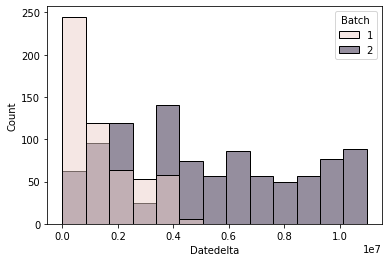

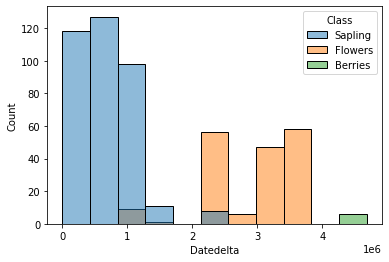

In [486]:
import seaborn as sns
sns.histplot(data=df_test.reset_index(drop=True),x='Datedelta',hue='Batch')
plt.show()
sns.histplot(data=df_test[df_test.Batch==1].reset_index(drop=True),x='Datedelta',hue='Class')

In [ ]:
sns.histplot(data=df_test[df_test.Batch==1].reset_index(drop=True),x='Datedelta',hue='Class')

In [504]:
print('Time for full growth {:.0f} days'.format(df_test[(df_test.Batch==1)&(df_test.Class=='Berries')]['Datedelta'].max()/60/60/24))

Time for full growth 54 days


In [507]:
q=df_test[(df_test.Batch==1)&(df_test.Class=='Flowers')]['Datedelta']
q=q[q>2e+6]
print('Average time for flowers to appear {:.0f} days'.format(q.mean()/60/60/24))

Average time for flowers to appear 33 days


In [511]:
q=df_test[(df_test.Batch==1)&(df_test.Class=='Sapling')]['Datedelta']
q=q[q<2e+6]
print('Sapling stage end  {:.0f} days'.format(q.max()/60/60/24))

Sapling stage end  15 days


In [512]:
len(df_test[(df_test.Batch==1)&(df_test.Class=='Sapling')])

362

In [513]:
len(df_test[(df_test.Batch==1)&(df_test.Class=='Flowers')])

177

In [514]:
len(df_test[(df_test.Batch==1)&(df_test.Class=='Berries')])

6